In [2]:
import os
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from skimage import io, img_as_float
from skimage.metrics import structural_similarity as ssim

/home/andres/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [3]:
# Function to normalize image to [0, 1]
def normalize_image(image):
    min_val = np.min(image)
    max_val = np.max(image)
    normalized_image = (image - min_val) / (max_val - min_val)
    return normalized_image

In [40]:
# Compute metrics
# Argument `right_bottom_padding` removes the maximum unpredicted padding in the right and bottom sides due to the CNN tile size
def show_metrics(ground_truth_path, prediction_path, right_bottom_padding=1):
    # Open rasters
    with rasterio.open(ground_truth_path) as src:
        ground_truth = src.read(1)
    with rasterio.open(prediction_path) as src:
        prediction = src.read(1)
        
    img1_np = np.array(ground_truth)[:-right_bottom_padding, :-right_bottom_padding]
    img2_np = np.array(prediction)[:-right_bottom_padding, :-right_bottom_padding]

    img1_flat = img1_np.flatten()
    img2_flat = img2_np.flatten()

    # Compute MSE
    mse = mean_squared_error(img1_flat, img2_flat)
    print(f"Mean Squared Error between the images: {mse}")

    # Compute SSIM
    img1_normalized = normalize_image(img1_np)
    img2_normalized = normalize_image(img2_np)

    ssim_value, ssim_map = ssim(img1_normalized, img2_normalized, data_range=1.0, full=True)
    print(f"SSIM: {ssim_value}")

    # Create subplots
    fig, axes = plt.subplots(1, 3, figsize=(10, 5))  # 1 row, 3 columnsz
    
    # Plot images
    axes[0].imshow(img1_np, cmap='plasma')
    axes[0].set_title('CNN Prediction')
    axes[0].axis('off') # Hide axes
    
    axes[1].imshow(img2_np, cmap='plasma')
    axes[1].set_title('Kriging Interpolation')
    axes[1].axis('off') # Hide axes

    # Display the SSIM map
    axes[2].imshow(ssim_map, cmap='gray')
    axes[2].set_title(f'SSIM Map (SSIM Value: {ssim_value:.4f})')
    axes[1].axis('off') # Hide axes
    #axes[2].colorbar()
    
    # Show the plot
    plt.tight_layout()
    plt.show()

## Zaragoza

Mean Squared Error between the images: 0.0003186510584782809
SSIM: 0.9807964591934742


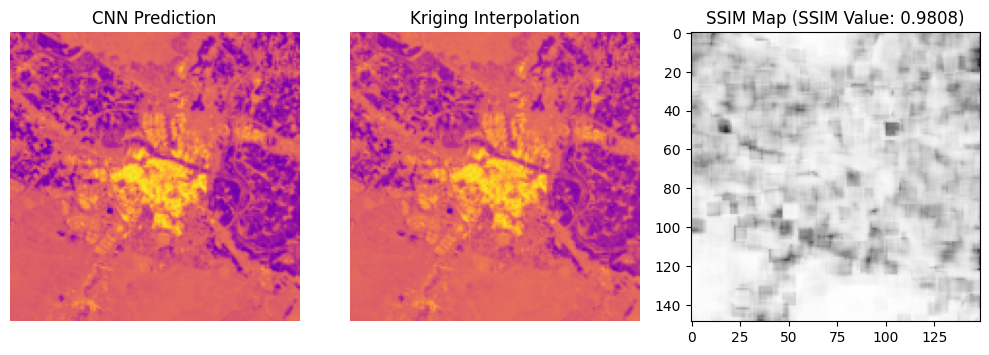

In [41]:
cnn_path = '../data/zaragoza/cnn/result_scaled.tif'
kriging_path = '../data/zaragoza/results/universal_kriging_without_projection.tif'
show_metrics(cnn_path, kriging_path, right_bottom_padding=3)

## Oviedo

Mean Squared Error between the images: 0.11816173046827316
SSIM: 0.24473949969380432


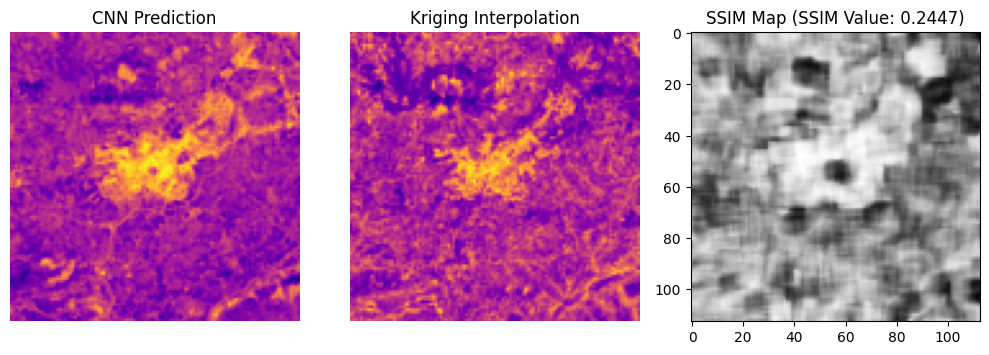

In [42]:
cnn_path = '../data/oviedo/cnn/result_scaled.tif'
kriging_path = '../data/oviedo_winter/results/universal_kriging_without_projection.tif'
show_metrics(cnn_path, kriging_path, right_bottom_padding=1)

## Sevilla

Mean Squared Error between the images: 0.014722739346325397
SSIM: 0.9776319915753129


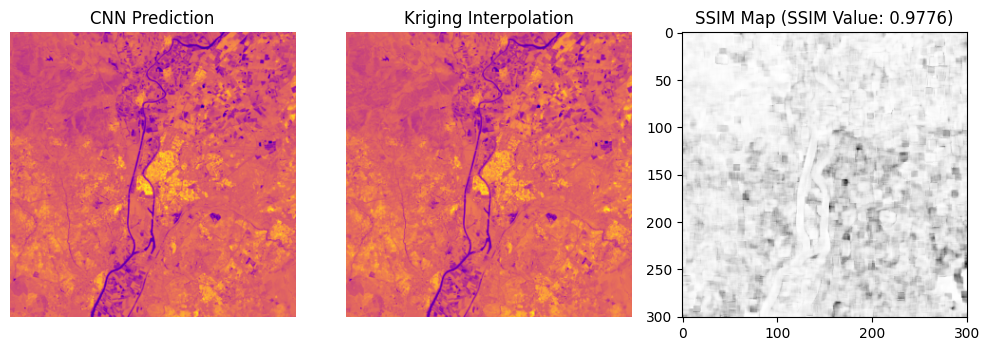

In [43]:
cnn_path = '../data/sevilla/cnn/cnn_result_scaled.tif'
kriging_path = '../data/sevilla/results/universal_kriging_without_projection.tif'
show_metrics(cnn_path, kriging_path, right_bottom_padding=3)

Mean Squared Error between the images: 0.04140714183449745
SSIM: 0.9713114124226591


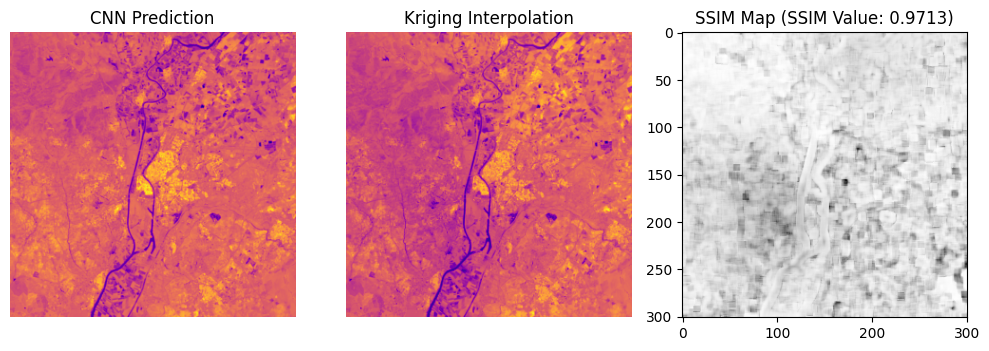

In [44]:
cnn_path = '../data/sevilla/cnn/cnn_result_scaled.tif'
kriging_path = '../data/sevilla/results/universal_kriging_with_projection.tif'
show_metrics(cnn_path, kriging_path, right_bottom_padding=3)

## Valencia

Mean Squared Error between the images: 0.06085324287414551
SSIM: 0.9445375584018949


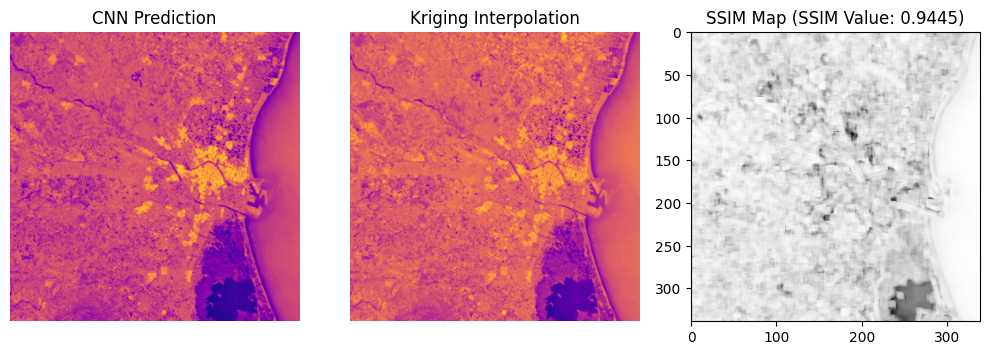

In [45]:
cnn_path = '../data/valencia/cnn/result_scaled.tif'
kriging_path = '../data/valencia/results/universal_kriging_without_projection.tif'
show_metrics(cnn_path, kriging_path, right_bottom_padding=3)

Mean Squared Error between the images: 0.1096072643995285
SSIM: 0.7266688759502475


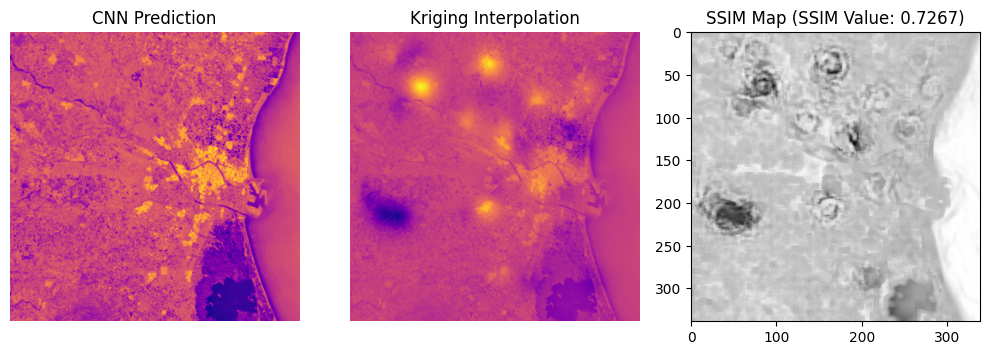

In [46]:
cnn_path = '../data/valencia/cnn/result_scaled.tif'
kriging_path = '../data/valencia/results/universal_kriging_with_projection.tif'
show_metrics(cnn_path, kriging_path, right_bottom_padding=3)